In [2]:
# read heart.csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read heart.csv
df = pd.read_csv('heart_disease.csv')

# print the first 5 rows of the dataframe
print(df.head())

   Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0    Male   39   postgraduate              0         0.0     0.0   
1  Female   46  primaryschool              0         0.0     0.0   
2    Male   48     uneducated              1        20.0     0.0   
3  Female   61       graduate              1        30.0     0.0   
4  Female   46       graduate              1        23.0     0.0   

  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0              no             0         0    195.0  106.0   70.0  26.97   
1              no             0         0    250.0  121.0   81.0  28.73   
2              no             0         0    245.0  127.5   80.0  25.34   
3              no             1         0    225.0  150.0   95.0  28.58   
4              no             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose Heart_ stroke  
0       80.0     77.0            No  
1       95.0     76.0            No  
2       75.0     70.0     

In [4]:
"""A1.ipynb

Gender': 'One-hot encoding because it is nominal',
    'age': 'No preprocessing needed because it is continuous',
    'education': 'Label encoding or ordinal encoding because it is ordinal',
    'currentSmoker': 'No preprocessing needed because it is binary',
    'cigsPerDay': 'No preprocessing needed because it is discrete',
    'BPMeds': 'No preprocessing needed because it is binary',
    'prevalentStroke': 'No preprocessing needed because it is binary',
    'prevalentHyp': 'No preprocessing needed because it is binary',
    'diabetes': 'No preprocessing needed because it is binary',
    'totChol': 'No preprocessing needed because it is continuous',
    'sysBP': 'No preprocessing needed because it is continuous',
    'diaBP': 'No preprocessing needed because it is continuous',
    'BMI': 'No preprocessing needed because it is continuous',
    'heartRate': 'No preprocessing needed because it is continuous',
    'glucose': 'No preprocessing needed because it is continuous',
    'Heart_stroke': 'No preprocessing needed because it is binary'
    
"""

# identify attribute types  
print(df.dtypes)

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke       object
dtype: object


In [5]:
# print descriptive statistics
print(df.describe())

               age  currentSmoker   cigsPerDay       BPMeds  prevalentHyp  \
count  4238.000000    4238.000000  4209.000000  4185.000000   4238.000000   
mean     49.584946       0.494101     9.003089     0.029630      0.310524   
std       8.572160       0.500024    11.920094     0.169584      0.462763   
min      32.000000       0.000000     0.000000     0.000000      0.000000   
25%      42.000000       0.000000     0.000000     0.000000      0.000000   
50%      49.000000       0.000000     0.000000     0.000000      0.000000   
75%      56.000000       1.000000    20.000000     0.000000      1.000000   
max      70.000000       1.000000    70.000000     1.000000      1.000000   

          diabetes      totChol        sysBP        diaBP          BMI  \
count  4238.000000  4188.000000  4238.000000  4238.000000  4219.000000   
mean      0.025720   236.721585   132.352407    82.893464    25.802008   
std       0.158316    44.590334    22.038097    11.910850     4.080111   
min       

In [6]:
print('Number of records (rows) in the dataset are', df.shape[0])
print('Number of attributes (columns) in the dataset are', df.shape[1])
print('Checking Null Values in the dataset: \n', df.isnull().sum())

Number of records (rows) in the dataset are 4238
Number of attributes (columns) in the dataset are 16
Checking Null Values in the dataset: 
 Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64


In [7]:
pd.isna(df).sum()[pd.isna(df).sum() > 0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [8]:
# categptical columns Gender, education, Heart_stroke, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, diabetes
# fill null values using mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

# null values in numerical variables through imputation by median
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())


In [9]:
# check for null values
print('Checking Null Values in the dataset: \n', df.isnull().sum())

Checking Null Values in the dataset: 
 Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64


In [10]:
# check for duplicate values
print('Number of duplicate records in the dataset are', df.duplicated().sum())

Number of duplicate records in the dataset are 0


In [11]:
# labels in categorical features
print('Unique values in the categorical features are: \n', df.select_dtypes(include=['object']).nunique())

object_columns = [(col, df[col].unique()) for col in df.columns if df[col].dtype == 'object']
for col, unique_values in object_columns:
    print(f'\n{col}\n{unique_values}')

Unique values in the categorical features are: 
 Gender             2
education          4
prevalentStroke    2
Heart_ stroke      2
dtype: int64

Gender
['Male' 'Female']

education
['postgraduate' 'primaryschool' 'uneducated' 'graduate']

prevalentStroke
['no' 'yes']

Heart_ stroke
['No' 'yes']


Checking class imbalance in the dataset:
 Heart_ stroke
No     3594
yes     644
Name: count, dtype: int64


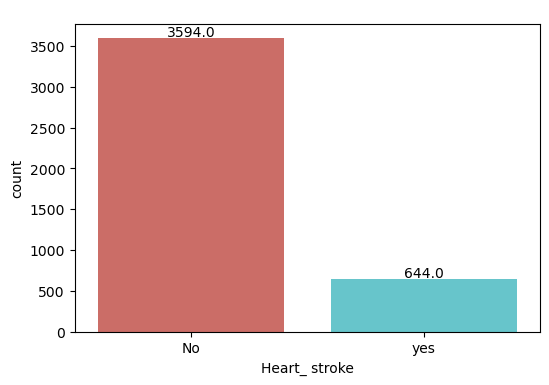

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt

# Check class imbalance
print('Checking class imbalance in the dataset:\n', df['Heart_ stroke'].value_counts())

# Draw bar graph
plt.figure(figsize=(6, 4))  # Set the figure size
ax = sns.countplot(x='Heart_ stroke', data=df, palette='hls')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

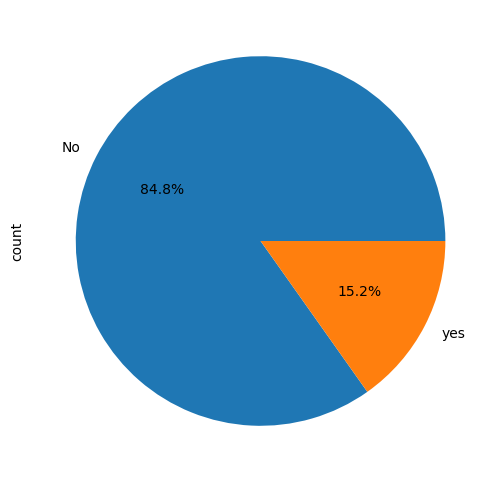

In [13]:
# draw pie chart too with percentages
plt.figure(figsize=(6, 6))
df['Heart_ stroke'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

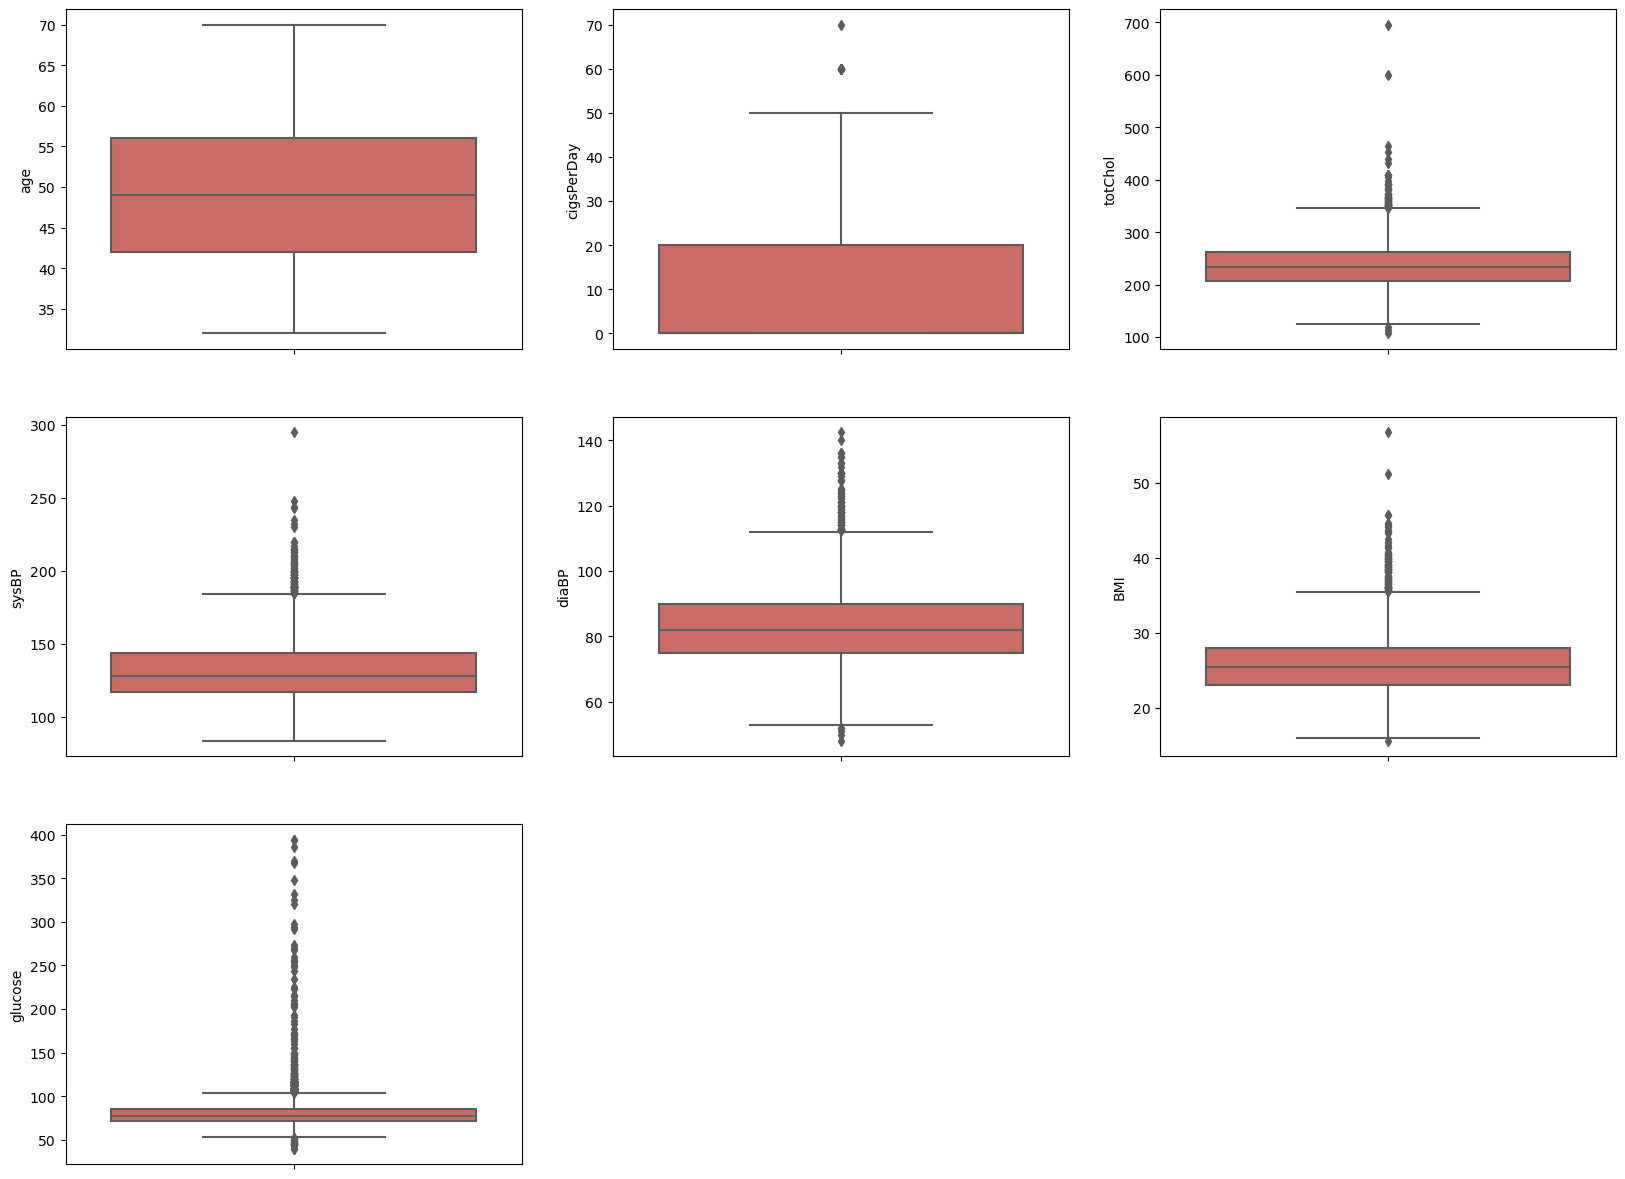

In [14]:
# numerical variables are age, cigsPerDay, totChol, sysBP, diaBP, BMI, glucose

# draw box plot for numerical variables
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(y='age', data=df, palette='hls')
plt.subplot(3, 3, 2)
sns.boxplot(y='cigsPerDay', data=df, palette='hls')
plt.subplot(3, 3, 3)
sns.boxplot(y='totChol', data=df, palette='hls')
plt.subplot(3, 3, 4)
sns.boxplot(y='sysBP', data=df, palette='hls')
plt.subplot(3, 3, 5)
sns.boxplot(y='diaBP', data=df, palette='hls')
plt.subplot(3, 3, 6)
sns.boxplot(y='BMI', data=df, palette='hls')
plt.subplot(3, 3, 7)
sns.boxplot(y='glucose', data=df, palette='hls')
plt.show()

In [15]:
# Outliers in cigsPerDay
Q1 = df['cigsPerDay'].quantile(0.25)
Q3 = df['cigsPerDay'].quantile(0.75)
IQR = Q3 - Q1
print('Outliers in cigsPerDay:', ((df['cigsPerDay'] < (Q1 - 1.5 * IQR)) | (df['cigsPerDay'] > (Q3 + 1.5 * IQR))).sum())

# Outliers in totChol
Q1 = df['totChol'].quantile(0.25)
Q3 = df['totChol'].quantile(0.75)
IQR = Q3 - Q1   
print('Outliers in totChol:', ((df['totChol'] < (Q1 - 1.5 * IQR)) | (df['totChol'] > (Q3 + 1.5 * IQR))).sum())

# Outliers in sysBP
Q1 = df['sysBP'].quantile(0.25)
Q3 = df['sysBP'].quantile(0.75) 
IQR = Q3 - Q1
print('Outliers in sysBP:', ((df['sysBP'] < (Q1 - 1.5 * IQR)) | (df['sysBP'] > (Q3 + 1.5 * IQR))).sum())

# Outliers in diaBP
Q1 = df['diaBP'].quantile(0.25) 
Q3 = df['diaBP'].quantile(0.75)
IQR = Q3 - Q1

print('Outliers in diaBP:', ((df['diaBP'] < (Q1 - 1.5 * IQR)) | (df['diaBP'] > (Q3 + 1.5 * IQR))).sum())

# Outliers in BMI
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
print('Outliers in BMI:', ((df['BMI'] < (Q1 - 1.5 * IQR)) | (df['BMI'] > (Q3 + 1.5 * IQR))).sum())

# Outliers in glucose
Q1 = df['glucose'].quantile(0.25)
Q3 = df['glucose'].quantile(0.75)
IQR = Q3 - Q1
print('Outliers in glucose:', ((df['glucose'] < (Q1 - 1.5 * IQR)) | (df['glucose'] > (Q3 + 1.5 * IQR))).sum())

Outliers in cigsPerDay: 12
Outliers in totChol: 57
Outliers in sysBP: 126
Outliers in diaBP: 81
Outliers in BMI: 97
Outliers in glucose: 262


C:\Users\shehe\AppData\Local\Temp\ipykernel_14808\1458593140.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
C:\Users\shehe\AppData\Local\Temp\ipykernel_14808\1458593140.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cigsPerDay'])
C:\Users\shehe\AppData\Local\Temp\ipykern

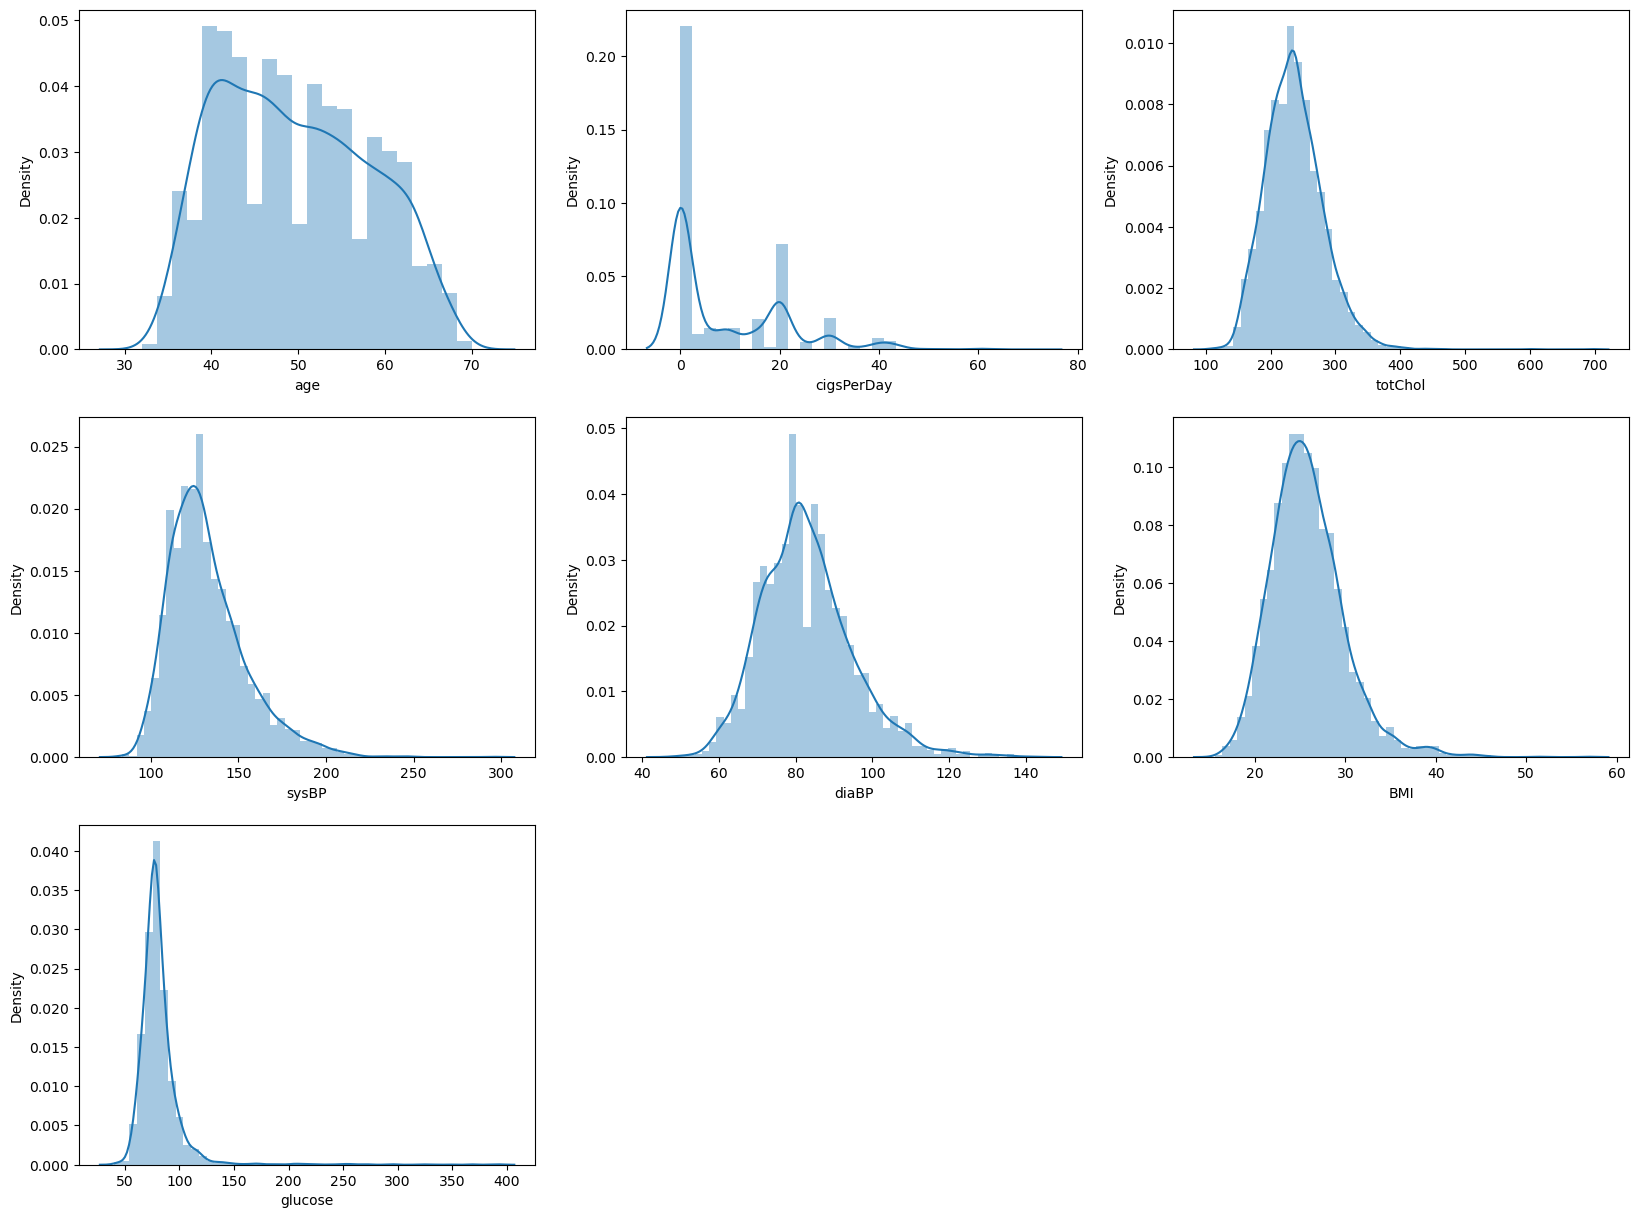

In [16]:
# plot distribution of numerical variables
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.distplot(df['age'])
plt.subplot(3, 3, 2)
sns.distplot(df['cigsPerDay'])
plt.subplot(3, 3, 3)
sns.distplot(df['totChol'])
plt.subplot(3, 3, 4)
sns.distplot(df['sysBP'])
plt.subplot(3, 3, 5)    
sns.distplot(df['diaBP'])
plt.subplot(3, 3, 6)
sns.distplot(df['BMI'])
plt.subplot(3, 3, 7)
sns.distplot(df['glucose'])
plt.show()

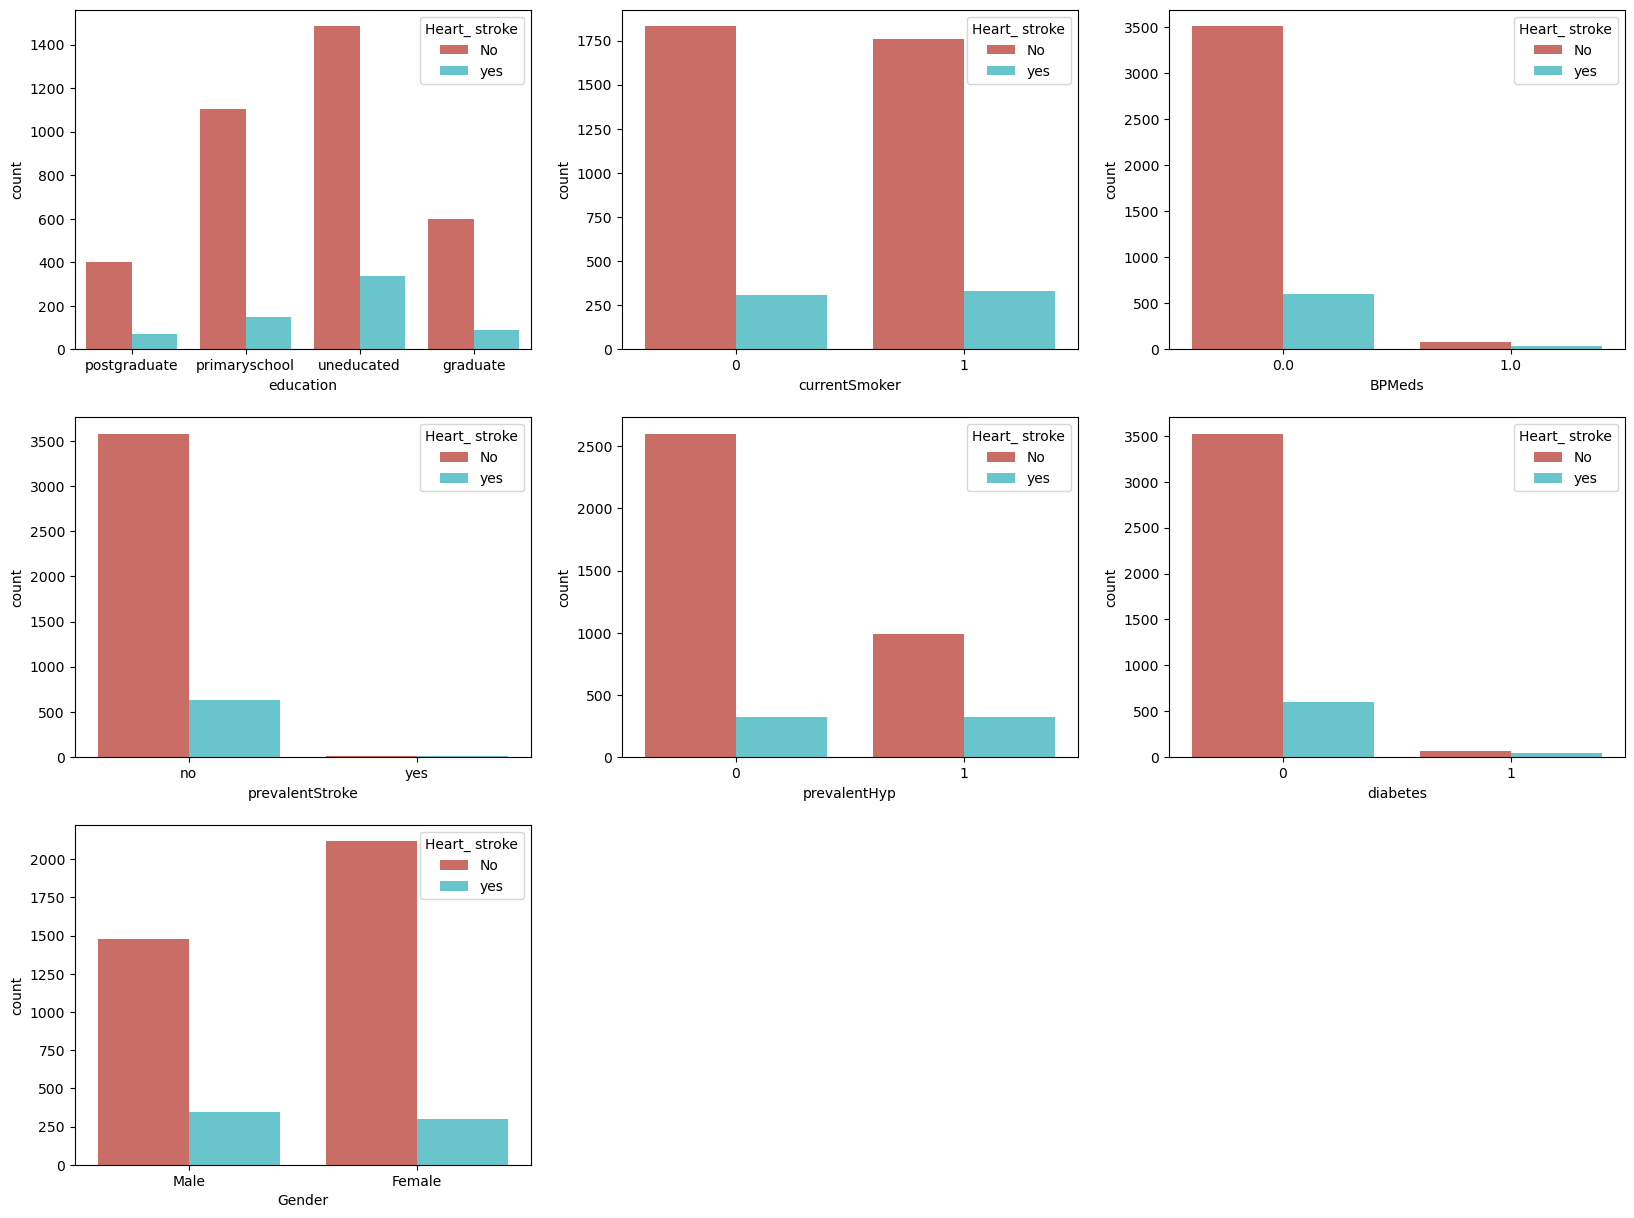

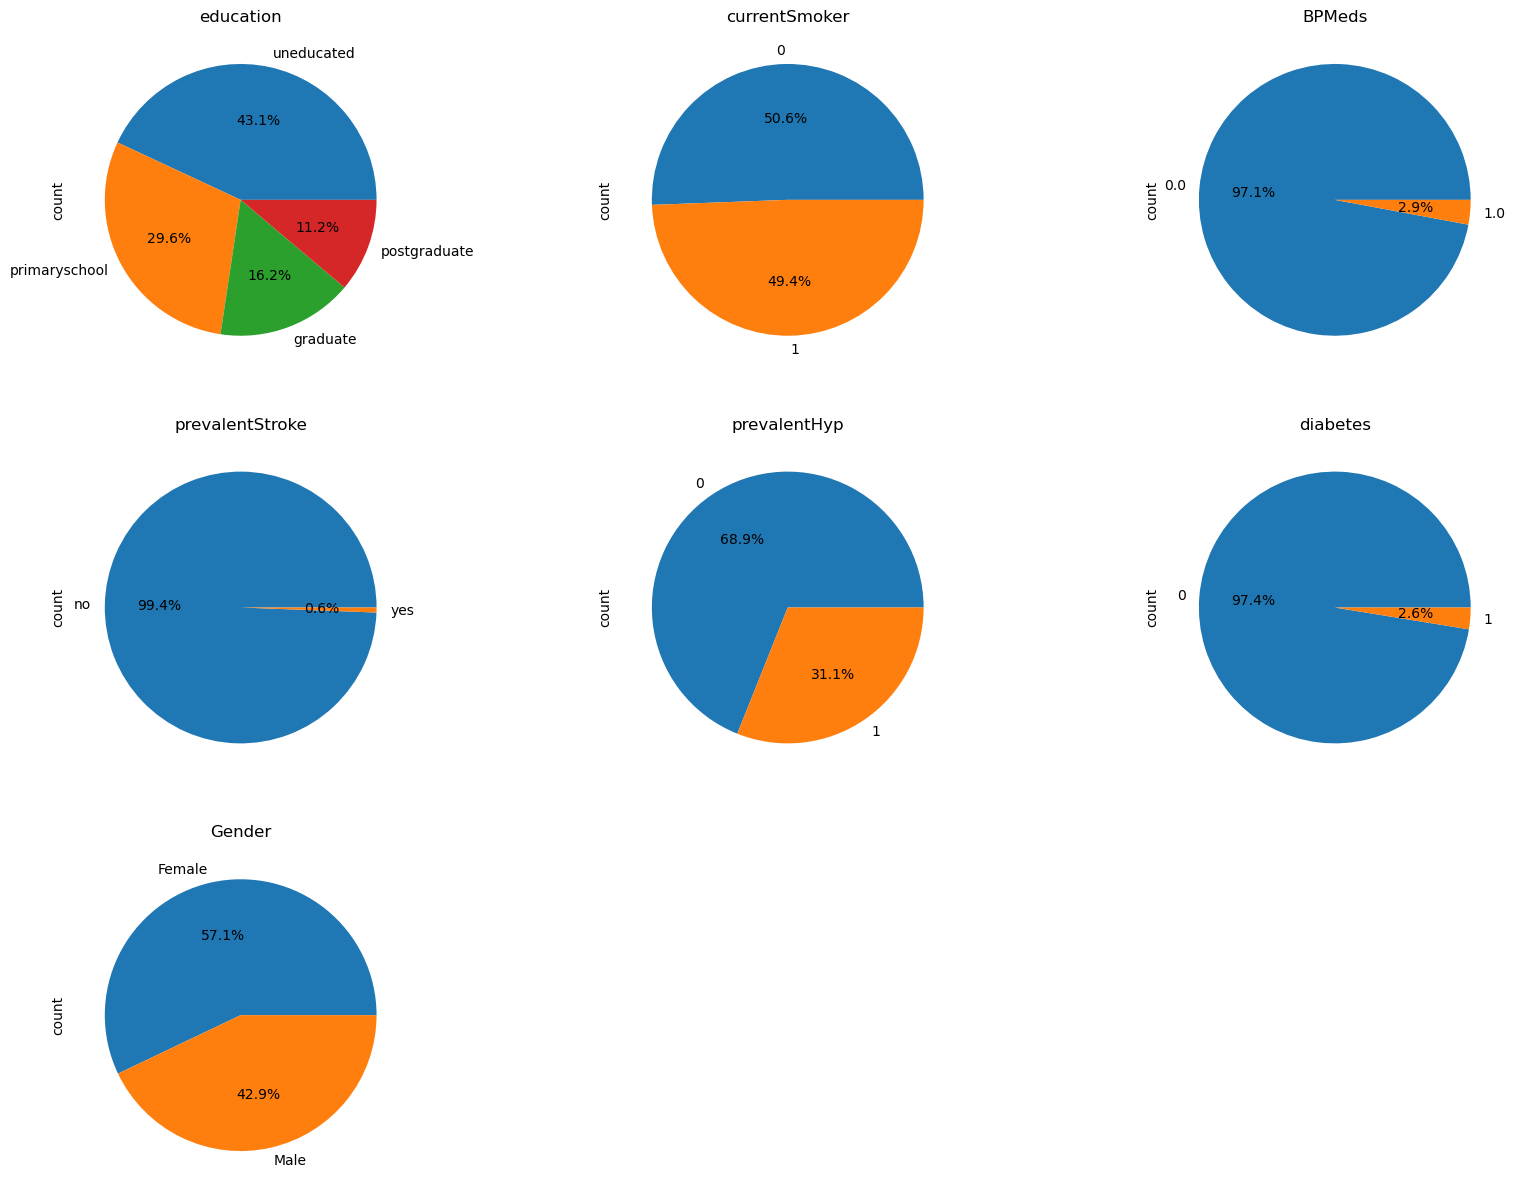

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features
features = ['education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'Gender']

# Plot bar graphs
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='Heart_ stroke', data=df, palette='hls')
plt.show()

# Plot pie charts
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    df[feature].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(feature)
plt.show()

In [18]:
# handling class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Define the dataset
X, y = df.drop('Heart_ stroke', axis=1), df['Heart_ stroke']

# Encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Apply SMOTE to handle class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Print the class distribution after applying SMOTE
print('Class distribution after applying SMOTE:', Counter(y_resampled))

Class distribution after applying SMOTE: Counter({'No': 3594, 'yes': 3594})


In [19]:
# training a model logistic regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

In [20]:
# data transfomation
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy of Random Forest is 0.9413044677570623
Accuracy of SVM is 0.9175211454089854
Accuracy of Decision Tree is 0.8867691053936158
Accuracy of KNN is 0.5169731408058242
Accuracy of Logistic Regression is 0.8507250753240166
Accuracy of Naive Bayes is 0.7650260403812222


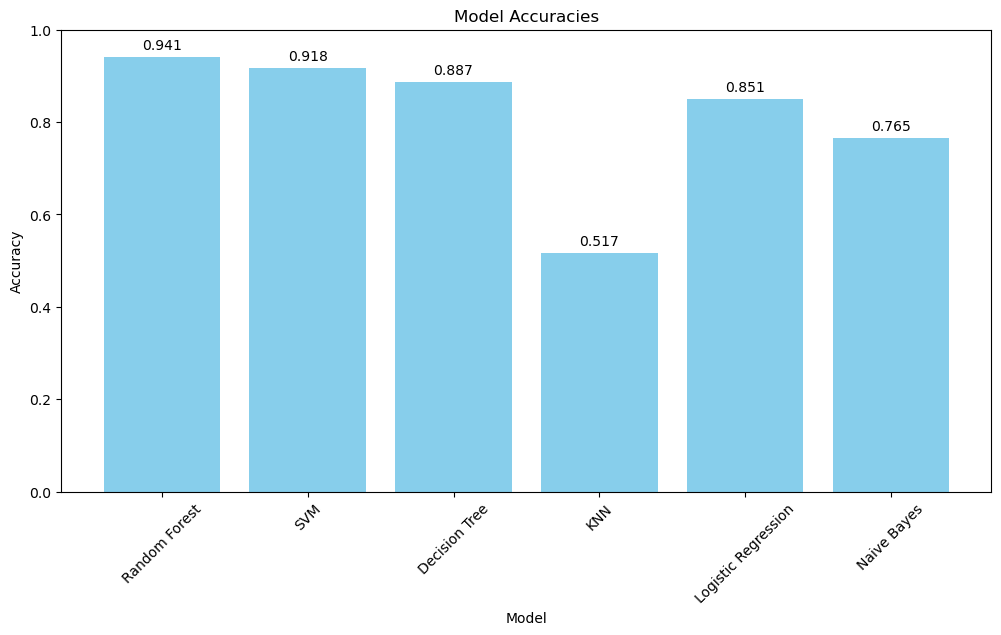

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import csr_matrix

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Initialize the models
models = [RandomForestClassifier(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression(max_iter=1000), GaussianNB()]

# Model names
model_names = ['Random Forest', 'SVM', 'Decision Tree', 'KNN', 'Logistic Regression', 'Naive Bayes']

# Initialize lists to store accuracies
accuracies = []

# Convert X_resampled to dense array if it's in sparse format
X_resampled_dense = X_resampled.toarray() if isinstance(X_resampled, csr_matrix) else X_resampled

# Cross-validation
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_resampled_dense, y_resampled, cv=5, scoring='accuracy')
    print(f'Accuracy of {name} is {np.mean(scores)}')
    accuracies.append(np.mean(scores))

# Plotting the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim([0, 1])
plt.xticks(rotation=45)

# Adding accuracy values to the bars
for bar, accuracy in zip(bars, accuracies):
    yval = round(accuracy, 3)
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, yval, ha='center', va='bottom')

plt.show()

In [22]:
# Random Forest
model_rf = RandomForestClassifier()

# Fit the model
model_rf.fit(X_train, y_train)

# Predict the class labels
y_pred_rf = model_rf.predict(X_test)

# Model evaluation
print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
#print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.9406583217431618
Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.98      0.94      1070
         yes       0.98      0.90      0.94      1087

    accuracy                           0.94      2157
   macro avg       0.94      0.94      0.94      2157
weighted avg       0.94      0.94      0.94      2157



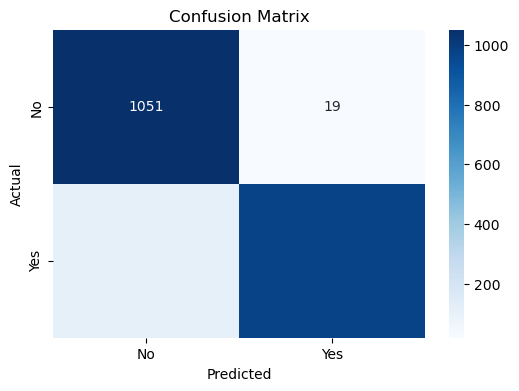

In [23]:
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Labeling the confusion matrix
class_names = ['No', 'Yes']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names)

plt.show()

In [25]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

models = [RandomForestClassifier(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression(max_iter=1000), GaussianNB()]

for model in models:
    model.fit(X_train_dense, y_train)
    y_pred = model.predict(X_test_dense)
    print(f'{model.__class__.__name__}:')
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))

RandomForestClassifier:
Confusion Matrix:
 [[1060   10]
 [ 118  969]]
Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.99      0.94      1070
         yes       0.99      0.89      0.94      1087

    accuracy                           0.94      2157
   macro avg       0.94      0.94      0.94      2157
weighted avg       0.95      0.94      0.94      2157

SVC:
Confusion Matrix:
 [[ 864  206]
 [  64 1023]]
Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.81      0.86      1070
         yes       0.83      0.94      0.88      1087

    accuracy                           0.87      2157
   macro avg       0.88      0.87      0.87      2157
weighted avg       0.88      0.87      0.87      2157

DecisionTreeClassifier:
Confusion Matrix:
 [[951 119]
 [173 914]]
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.8